In [4]:
import numpy as np 
import pandas as pd 
import os,zipfile
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# os.mkdir('dataset')
dataset_dir = 'dataset'

In [6]:
target_file = 'used-car-dataset-ford-and-mercedes.zip'

In [7]:
extracting = zipfile.ZipFile(target_file, 'r')
extracting.extractall(dataset_dir)
extracting.close()

In [8]:
for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\audi.csv
dataset\bmw.csv
dataset\cclass.csv
dataset\focus.csv
dataset\ford.csv
dataset\hyundi.csv
dataset\merc.csv
dataset\skoda.csv
dataset\toyota.csv
dataset\unclean cclass.csv
dataset\unclean focus.csv
dataset\vauxhall.csv
dataset\vw.csv


In [9]:
os.listdir()

['CarPredictionRegression.ipynb',
 'dataset',
 'images',
 'README.md',
 'used-car-dataset-ford-and-mercedes.zip']

In [10]:
data= os.listdir(f"{dataset_dir}/")
print(data)

['audi.csv', 'bmw.csv', 'cclass.csv', 'focus.csv', 'ford.csv', 'hyundi.csv', 'merc.csv', 'skoda.csv', 'toyota.csv', 'unclean cclass.csv', 'unclean focus.csv', 'vauxhall.csv', 'vw.csv']


In [11]:
for d in data:
    path=f"{dataset_dir}/"+d
    df=pd.read_csv(path)
    print(df.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'tax(£)', 'mpg', 'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      d

In [12]:
bos=pd.DataFrame()
for d in data:
    path=f"{dataset_dir}/"+d
    if "unclean" not in d:
        df=pd.read_csv(path)
        df=df[['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize']]
        df['brand']=d.replace(".csv", "")
        bos=pd.concat([bos,df])


In [13]:
year_filter = df['year']!=2060
df = df[year_filter]

In [14]:
bos.sample(5)

,model,year,price,transmission,mileage,fuelType,engineSize,brand
248,Focus,2017,16698,Manual,24498,Diesel,2.0,focus
437,Tucson,2016,16498,Automatic,28723,Diesel,2.0,hyundi
7665,Mokka X,2016,9998,Manual,21276,Petrol,1.6,vauxhall
171,Q5,2017,25498,Semi-Auto,27948,Petrol,2.0,audi
11848,Grandland X,2019,16498,Manual,6440,Diesel,1.5,vauxhall


In [15]:
bos['brand']=bos['brand'].str.replace('focus', "ford")

In [16]:
bos.sample(5)

,model,year,price,transmission,mileage,fuelType,engineSize,brand
8844,C Class,2019,26499,Semi-Auto,3798,Petrol,1.5,merc
2491,Yaris,2013,9995,Automatic,30984,Hybrid,1.5,toyota
3262,3 Series,2019,39980,Semi-Auto,3007,Petrol,3.0,bmw
2433,C Class,2017,25599,Semi-Auto,13000,Petrol,2.0,cclass
12812,Up,2020,9699,Manual,500,Petrol,1.0,vw


In [17]:
df=bos

In [18]:
df.sample(3)

,model,year,price,transmission,mileage,fuelType,engineSize,brand
348,5 Series,2016,14495,Semi-Auto,51700,Diesel,2.0,bmw
10614,Tiguan,2019,27995,Semi-Auto,8854,Diesel,2.0,vw
6111,Prius,2016,17480,Automatic,41487,Hybrid,1.8,toyota


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108540 entries, 0 to 15156
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   engineSize    108540 non-null  float64
 7   brand         108540 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 7.5+ MB


In [20]:
df.tail(3)

,model,year,price,transmission,mileage,fuelType,engineSize,brand
15154,Fox,2009,1590,Manual,70000,Petrol,1.4,vw
15155,Fox,2006,1250,Manual,82704,Petrol,1.2,vw
15156,Fox,2007,2295,Manual,74000,Petrol,1.2,vw


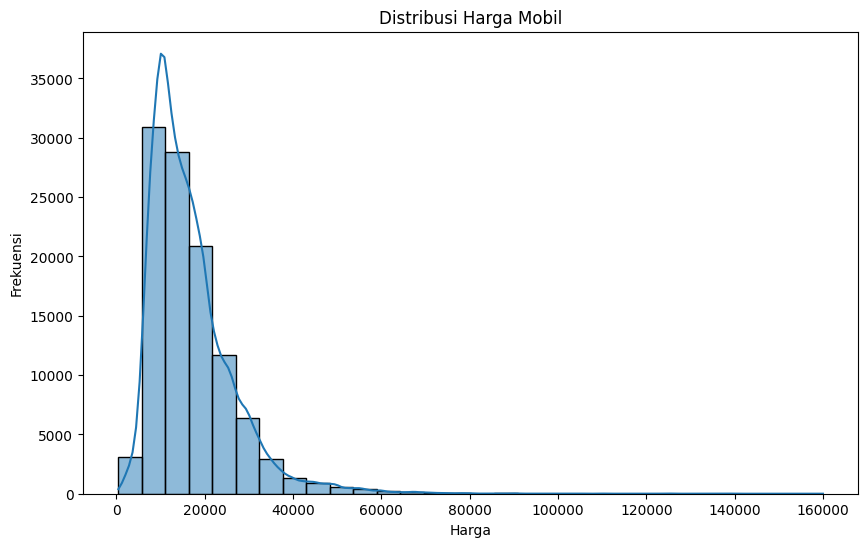

In [21]:
# 1. Distribusi harga mobil
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribusi Harga Mobil')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

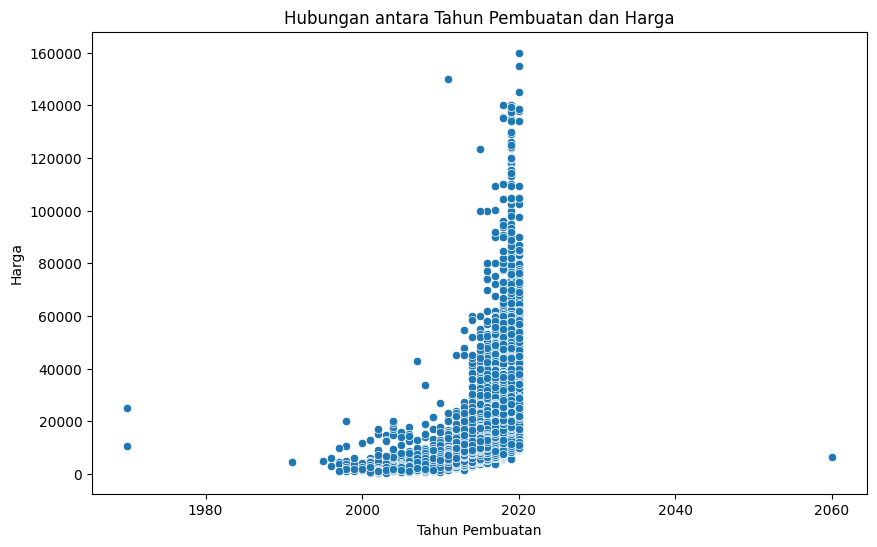

In [22]:
# 2. Hubungan antara tahun pembuatan dan harga
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=df)
plt.title('Hubungan antara Tahun Pembuatan dan Harga')
plt.xlabel('Tahun Pembuatan')
plt.ylabel('Harga')
plt.show()

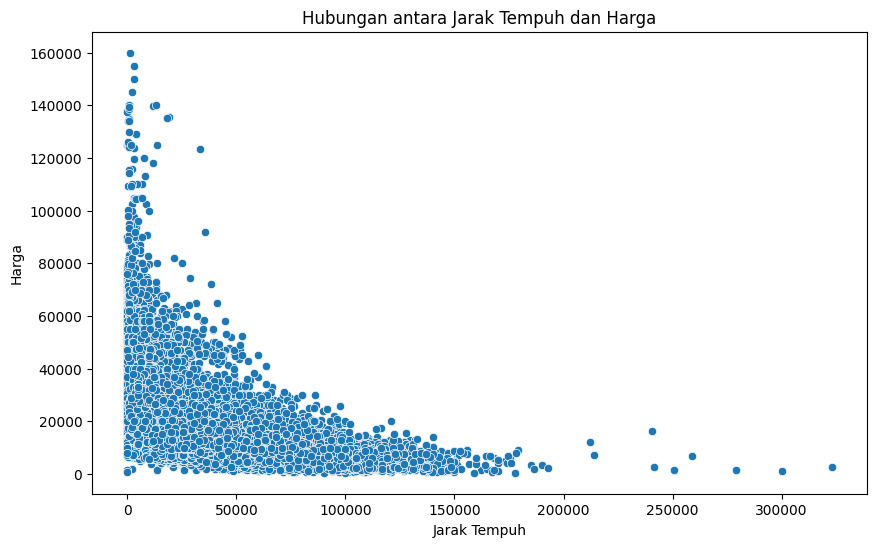

In [23]:
# 3. Hubungan antara jarak tempuh dan harga
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', data=df)
plt.title('Hubungan antara Jarak Tempuh dan Harga')
plt.xlabel('Jarak Tempuh')
plt.ylabel('Harga')
plt.show()

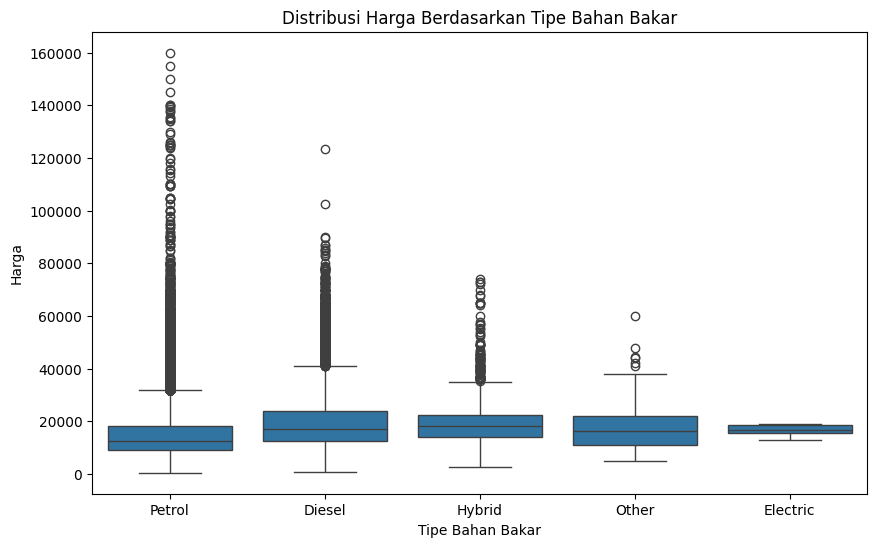

In [24]:
# 4. Distribusi harga berdasarkan tipe bahan bakar
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuelType', y='price', data=df)
plt.title('Distribusi Harga Berdasarkan Tipe Bahan Bakar')
plt.xlabel('Tipe Bahan Bakar')
plt.ylabel('Harga')
plt.show()

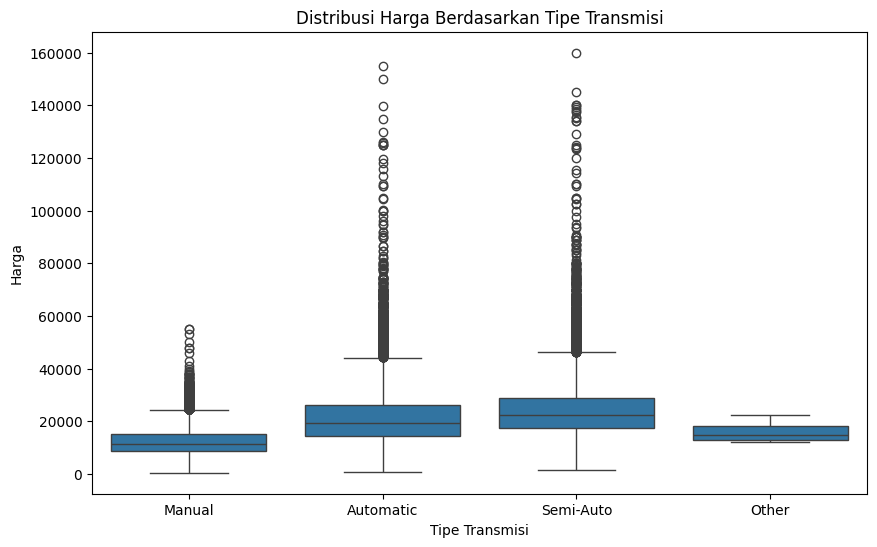

In [25]:
# 5. Distribusi harga berdasarkan tipe transmisi
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Distribusi Harga Berdasarkan Tipe Transmisi')
plt.xlabel('Tipe Transmisi')
plt.ylabel('Harga')
plt.show()

In [26]:
s={
    "model": "Focus",
    "year":2018,
    "price":0,
    "transmission":"Automatic",
    "mileage":40000,
    "fuelType": "Petrol",
    "engineSize": 1.6,
    "brand":"ford"
}

mycar=pd.DataFrame([s])


In [27]:
mycar

,model,year,price,transmission,mileage,fuelType,engineSize,brand
0,Focus,2018,0,Automatic,40000,Petrol,1.6,ford


In [28]:
df=pd.concat([df,mycar])

In [29]:
df.tail(3)

,model,year,price,transmission,mileage,fuelType,engineSize,brand
15155,Fox,2006,1250,Manual,82704,Petrol,1.2,vw
15156,Fox,2007,2295,Manual,74000,Petrol,1.2,vw
0,Focus,2018,0,Automatic,40000,Petrol,1.6,ford


In [30]:
dfdum=pd.get_dummies(df,columns=["model","transmission","fuelType","brand"],drop_first=True)

In [31]:
dfdum.head()

,year,price,mileage,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,fuelType_Petrol,brand_bmw,brand_cclass,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw
0,2017,12500,15735,1.4,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,2016,16500,36203,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2016,11000,29946,1.4,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,2017,16800,25952,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2019,17300,1998,1.0,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [32]:
prediction=dfdum.iloc[[-1]]
prediction=prediction.drop("price", axis=1)
prediciton=prediction.iloc[0]

In [33]:
dfdum=dfdum.iloc[0:-1]
y=dfdum['price']
x=dfdum.drop('price', axis=1)

In [34]:
lr=LinearRegression()
model=lr.fit(x,y)
model.score(x,y)

0.8529259517881365

In [39]:
model.predict(prediction)
predictions = model.predict(x)

In [44]:
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = mean_squared_error(y, predictions, squared=False)
r2 = r2_score(y, predictions)


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [45]:
# Menampilkan hasil evaluasi
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 2310.37243709972
Mean Squared Error (MSE): 13999076.395229207
Root Mean Squared Error (RMSE): 3741.533962859245
R² Score: 0.8529259517881365
